# <span style="color:Orange;">**🥴 Obesity Risk Prediction**</span>



<span style="color:skyblue;">___Project Domain : Health Care___</span>

- __The goal of this project is to develop a ML model that should classify the obesity risk in individuals, which is related to cardiovascular disease.__
- __This is a multiclass  classification project,in which the model is builded to predict the obseity level of the induviduals.__
- __The dataset is taken from [kaggle](https://www.kaggle.com/competitions/playground-series-s4e2) which has two ".csv" files "train.csv" and "test.csv" for training and testing.__
- __Initially EDA is done and then followed by various preprocessing techniques. Finally a classification model is developed and evaluated to obatin good accuracy.__


![](https://img.freepik.com/free-vector/obesity-concept-illustration_1284-12000.jpg?w=740&t=st=1709873005~exp=1709873605~hmac=9c631c7e6e7ee16955bc2ba85ac1b73c20a79f440dade07741741ff0c4125b23)

***Image Credits :[Freepik](https://www.freepik.com/)***

### **Exploratory Data Analysis (EDA) and Machine Learning**
------------------------------------------------------------------------------------------------------------------

### ***Load Datasets :***

In [41]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#Train data
df_train=pd.read_csv("train.csv")
df_train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [43]:
#Shape of the data:
print("Shape of  Train data :",df_train.shape)


Shape of  Train data : (20758, 18)


In [44]:
#Checking for duplicates 
df_train.duplicated().sum()

0

-------------------------------------------------------------------------------------------------------------------
### ***Exploratory Data Analysis (EDA)***
-------------------------------------------------------------------------------------------------------------------

***Feature Variables :***
- 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'.

***Target Variable :***
- 'NObeyesdad'

___Understanding the Variables :___
- Frequent consumption of high caloric food     - FAVC
- Frequency of consumption of vegetables        - FCVC
- Number of main meals                          - NCP
- Consumption of food between meals             - CAEC
- Consumption of water daily                    - CH20
- Consumption of alcohol                        - CALC
- Calories consumption monitoring               - SCC
- Time using technology devices                 - TUE 
- Physical activity frequency                   - FAF
- Mode of Transportation                        - MTRANS
- Smoking                                       - SMOKE
- Height                                        - Height in meters
- Weight                                        - Weight in kg

___Dataset Basic Information :___

In [45]:
#Basic information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

___Data Summary :___

In [46]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


___Checking for Missing Values (NaN):___

In [47]:
pd.DataFrame(df_train.isna().sum()).transpose()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


___Checking for Errors in Categorical Variables :___

In [48]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for variable in categorical_variables:
     print("-"*100)
     print(df_train[variable].value_counts())

----------------------------------------------------------------------------------------------------
Gender
Female    10422
Male      10336
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
FAVC
yes    18982
no      1776
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOKE
no     20513
yes      245
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SCC
no     20071
yes

___Univariate Analysis :___

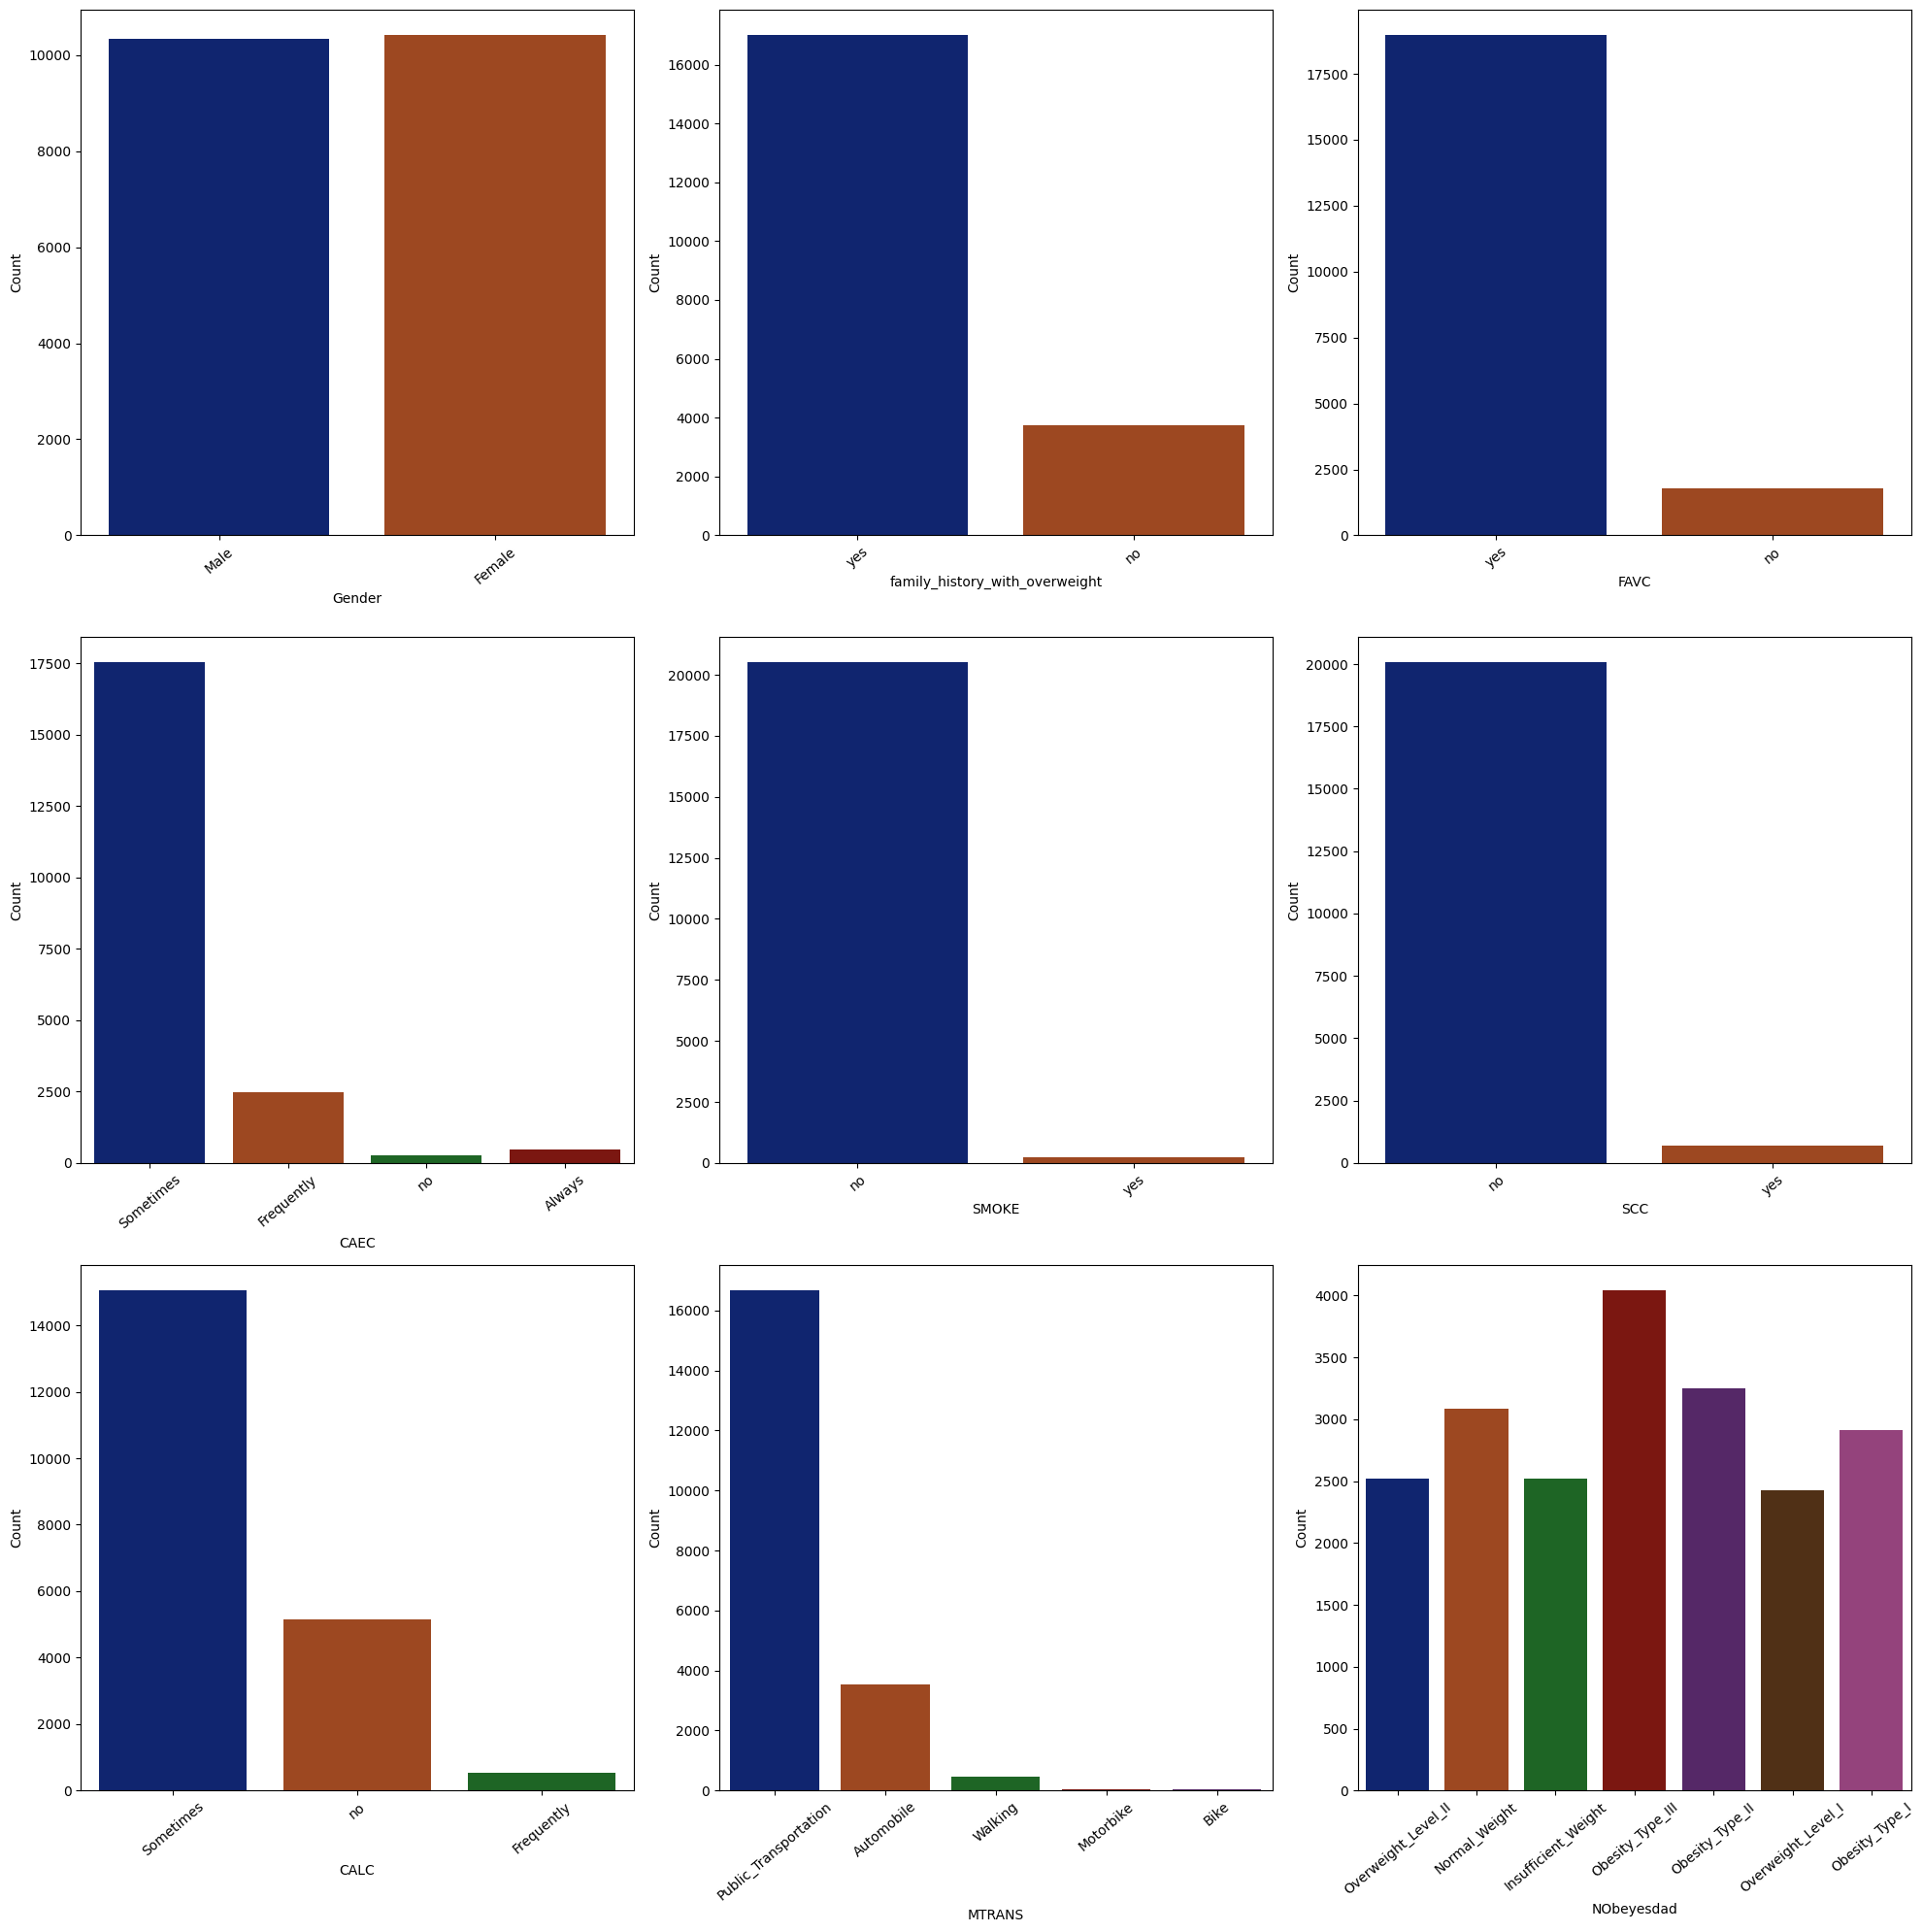

In [49]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables:
    plt.subplot(3,3,ind)
    sns.countplot(x=df_train[variable],palette='dark')
    plt.ylabel('Count')
    plt.xlabel(variable)
    plt.xticks(rotation=40)
    ind+=1
plt.tight_layout()
plt.show()


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Inference:___

- Gender: Male and female are almost equally Distributed.
- Family history with overweight : Around 82% of people's family members are suffering from overweight.
- FAVC -  91.4% of people frequently consume high caloric food.
- CAEC -  84.4% of people consume food between meals.
- SMOKE - 98.8% of people doesn't smoke.
- SCC - 96.7% of people monitors theier calorie consumption.
- CALC - 72.6% of people sometimes consume alchohol.
- MTRANS - 80.4% of people use public transport as their transportation mode.
- NObeyesdad- 19.4% people belongs to Obesity_Type_III and 14.8% people belongs to Normal_Weight category.


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Comparing the Categorigal Variables with Target :___

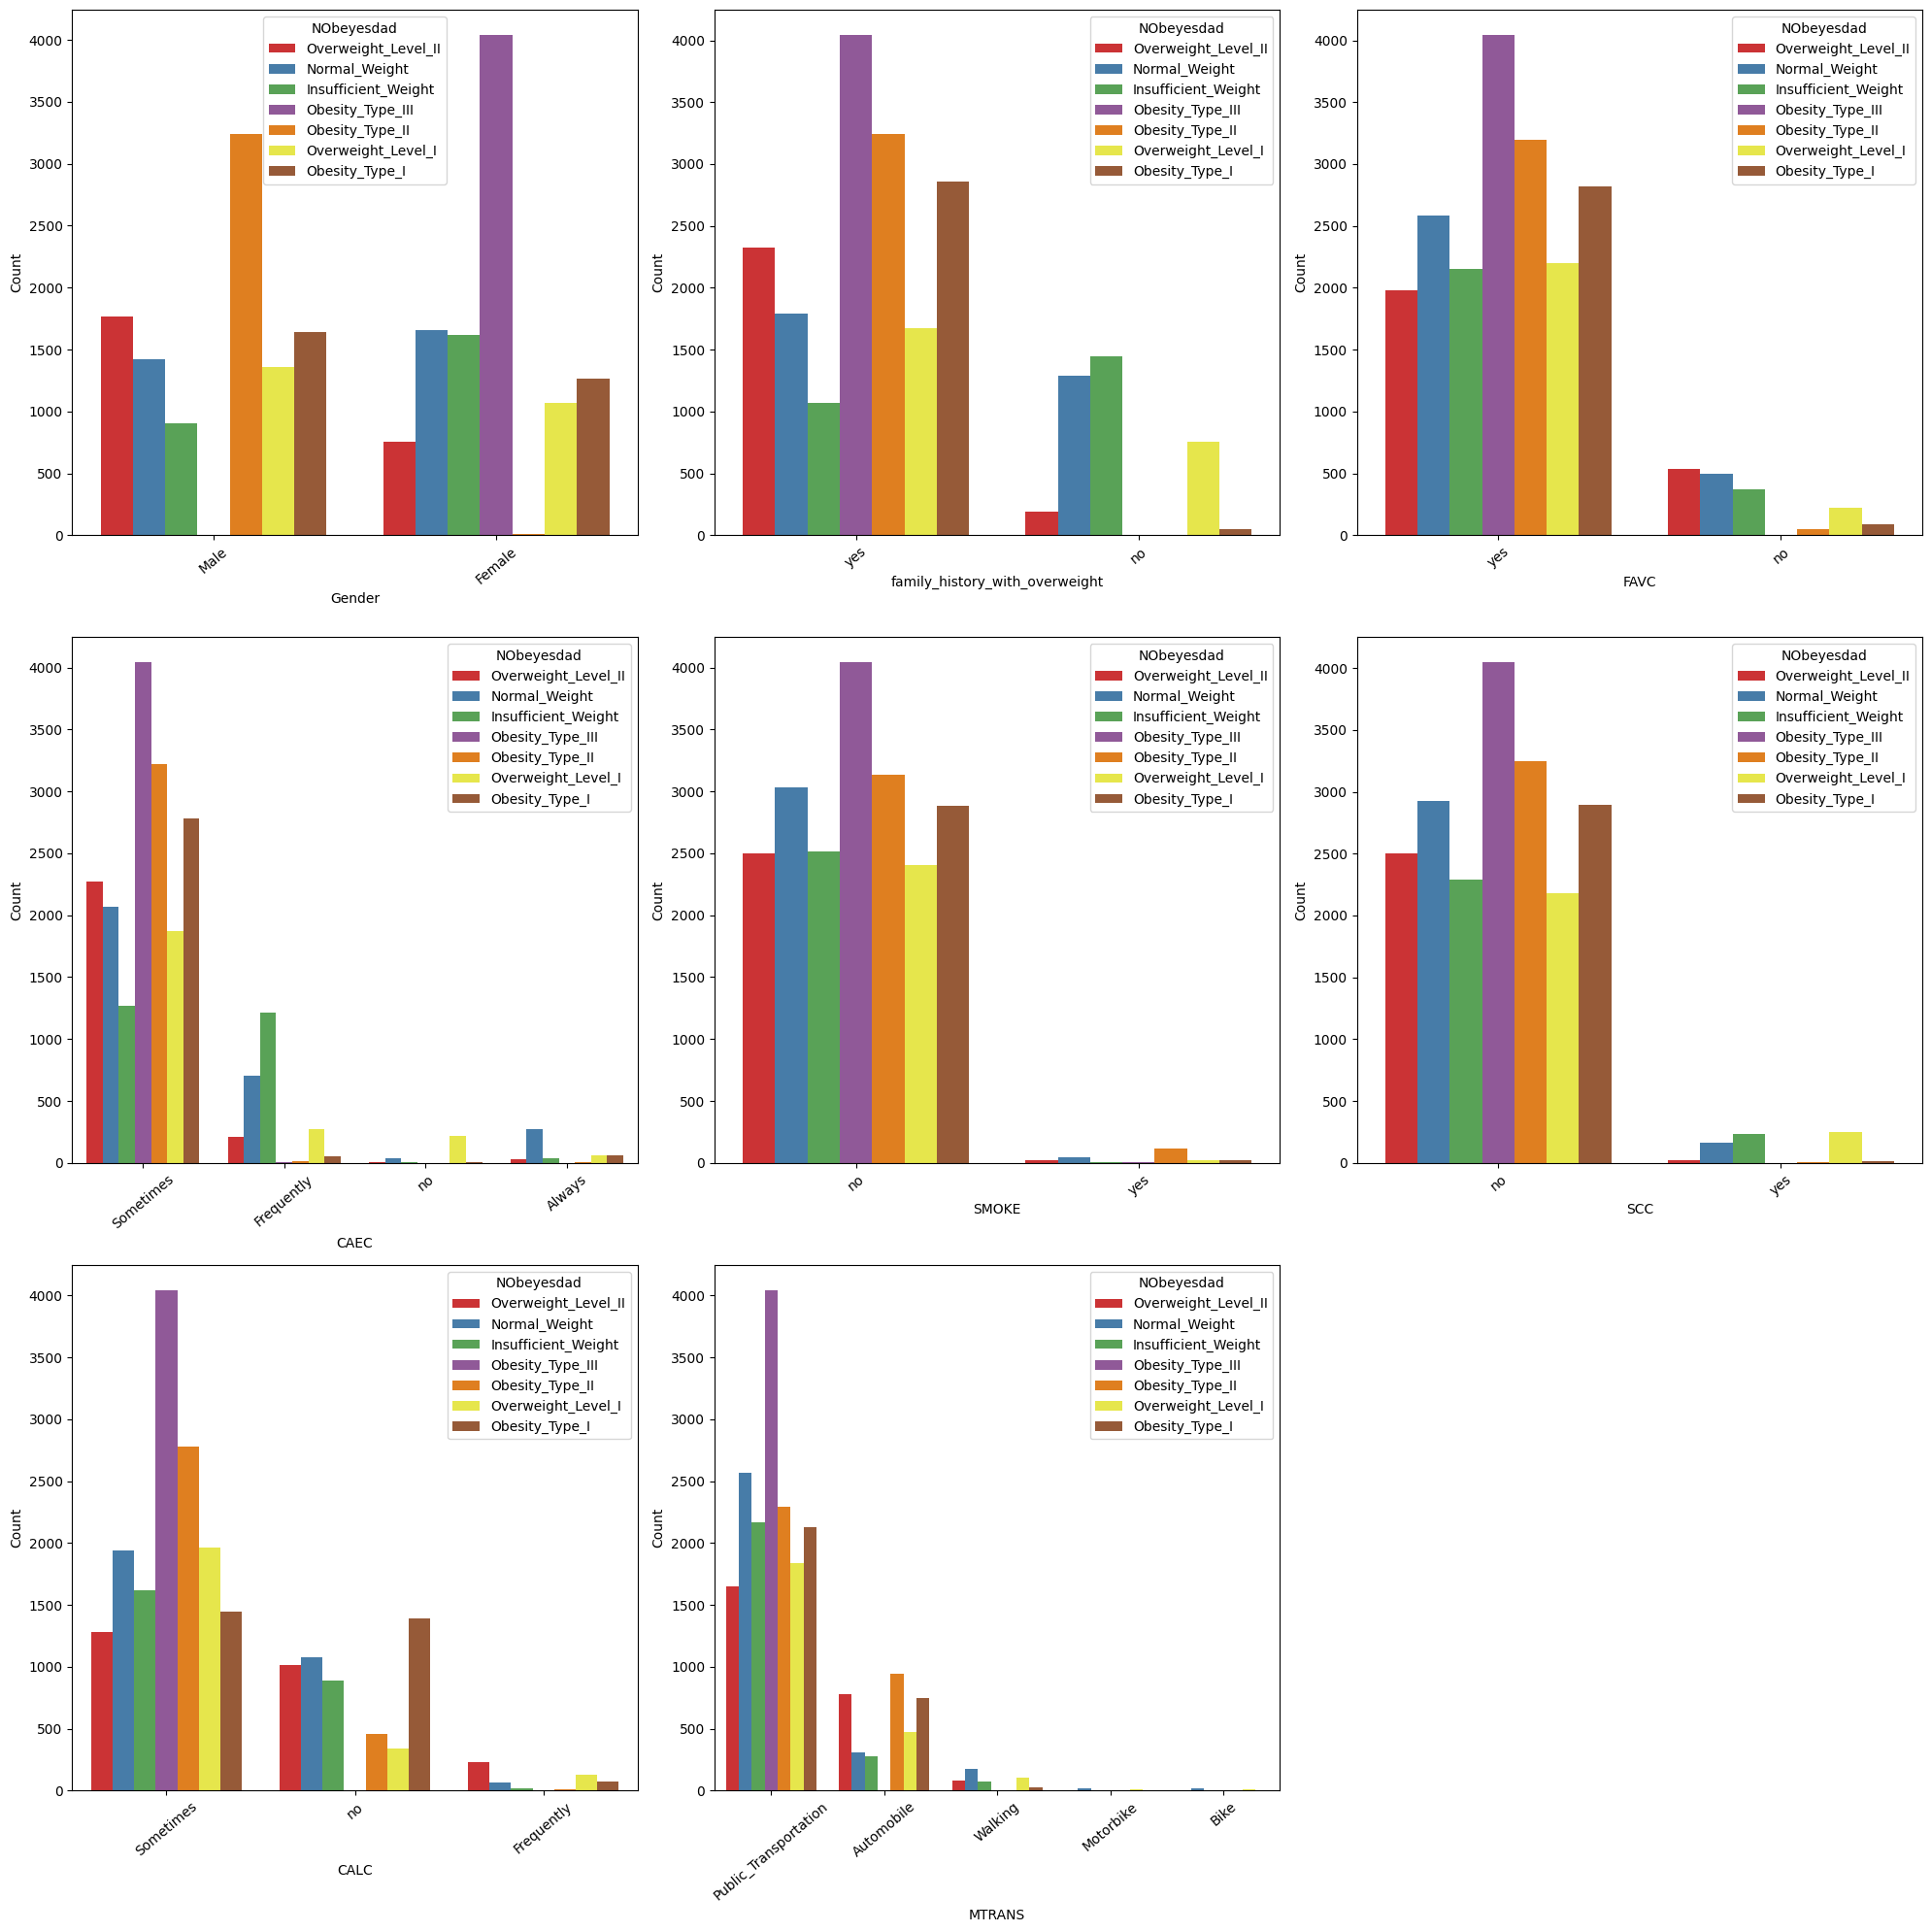

In [50]:
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables[:8]:
    plt.subplot(3,3,ind)
    sns.countplot(x=df_train[variable],palette='Set1',hue=df_train["NObeyesdad"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    plt.xticks(rotation=40)
    ind+=1
plt.tight_layout()
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Inference:___
- 19.4% Females are in Obesity_Type_III and 15.6% Males are  Obesity_Type_II .
- 19.4% people with Family History of overweight are in Obesity_Type_III .
- ***10.2% the people who uses Public Transports for transportation are belongs to Obesity_Type_III.***
- People who monitors calories have much less chance of getting overweight & obese.
- People who consumes high calories food frequently having much higher chance of getting obese than others.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

- ***"SMOKE" and "SCC" columns are not related to the target as comparing the other columns.It is suggested to remove those columns.***

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

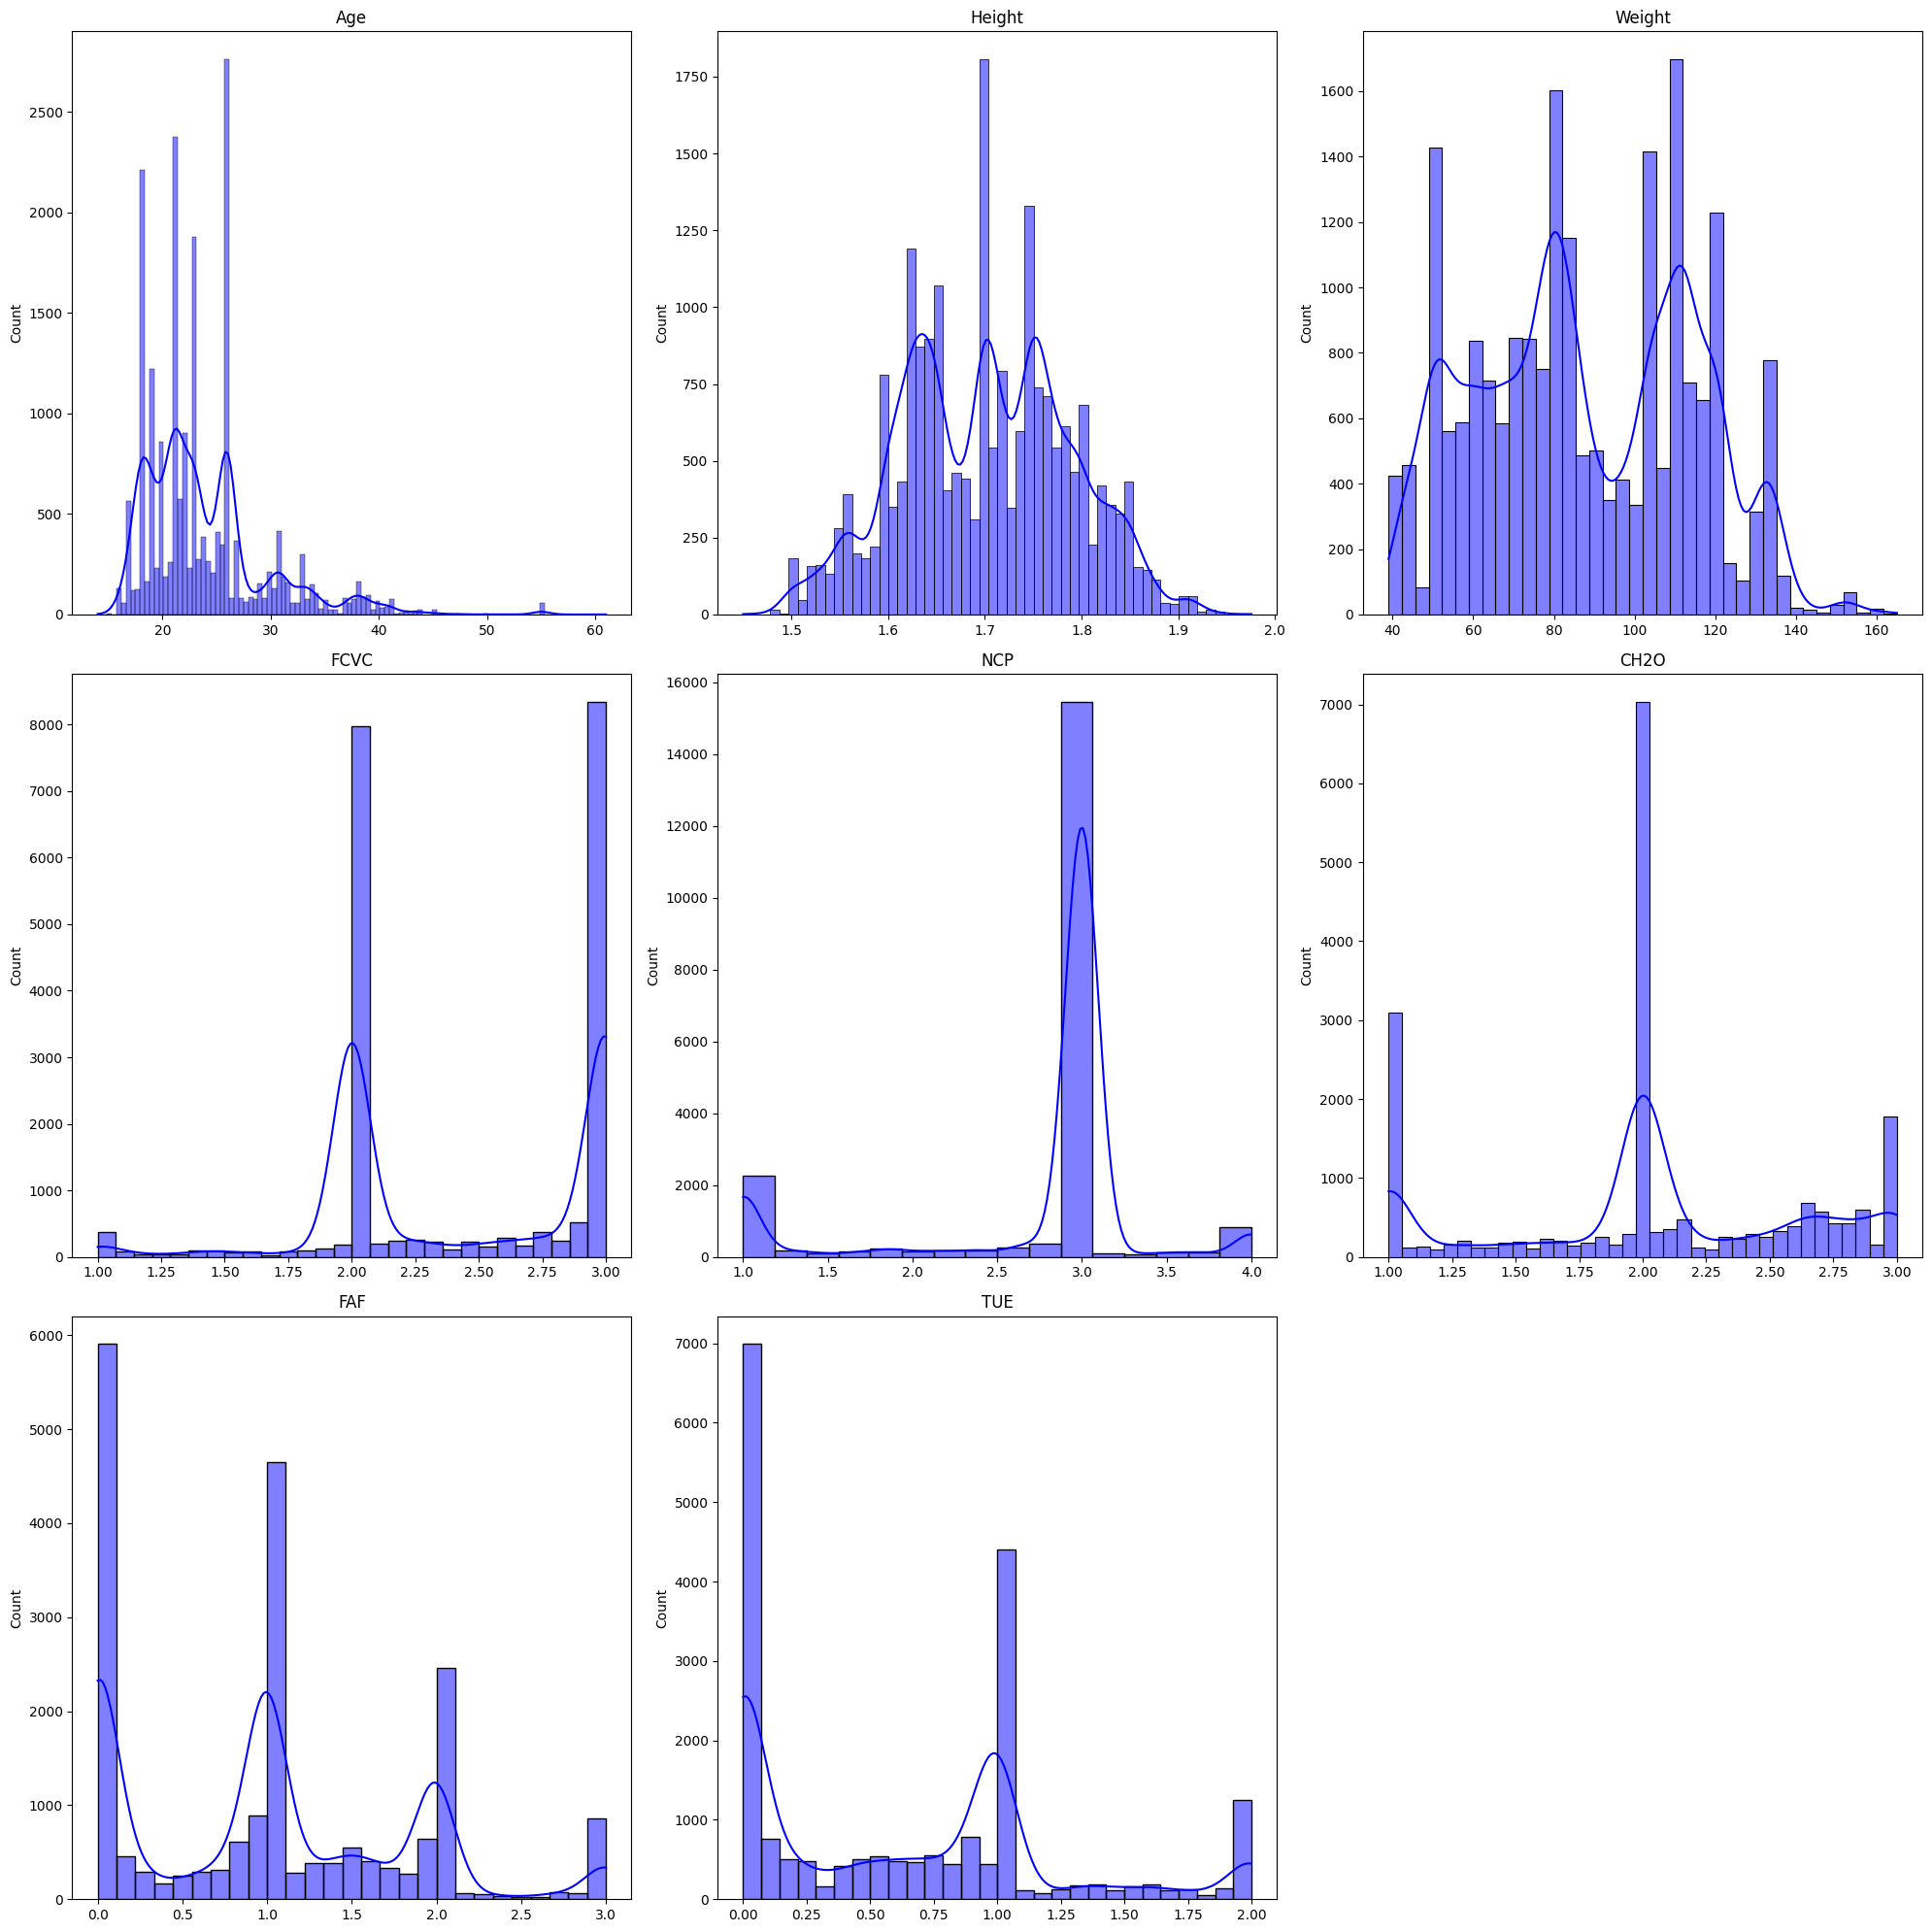

In [51]:
#Data distribution of numerical variables
numerical_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',]
#Histogram
plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.histplot(x=df_train[variable],kde=True,color="blue")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [52]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


___Checking for Outliers in Numerical Variables:___

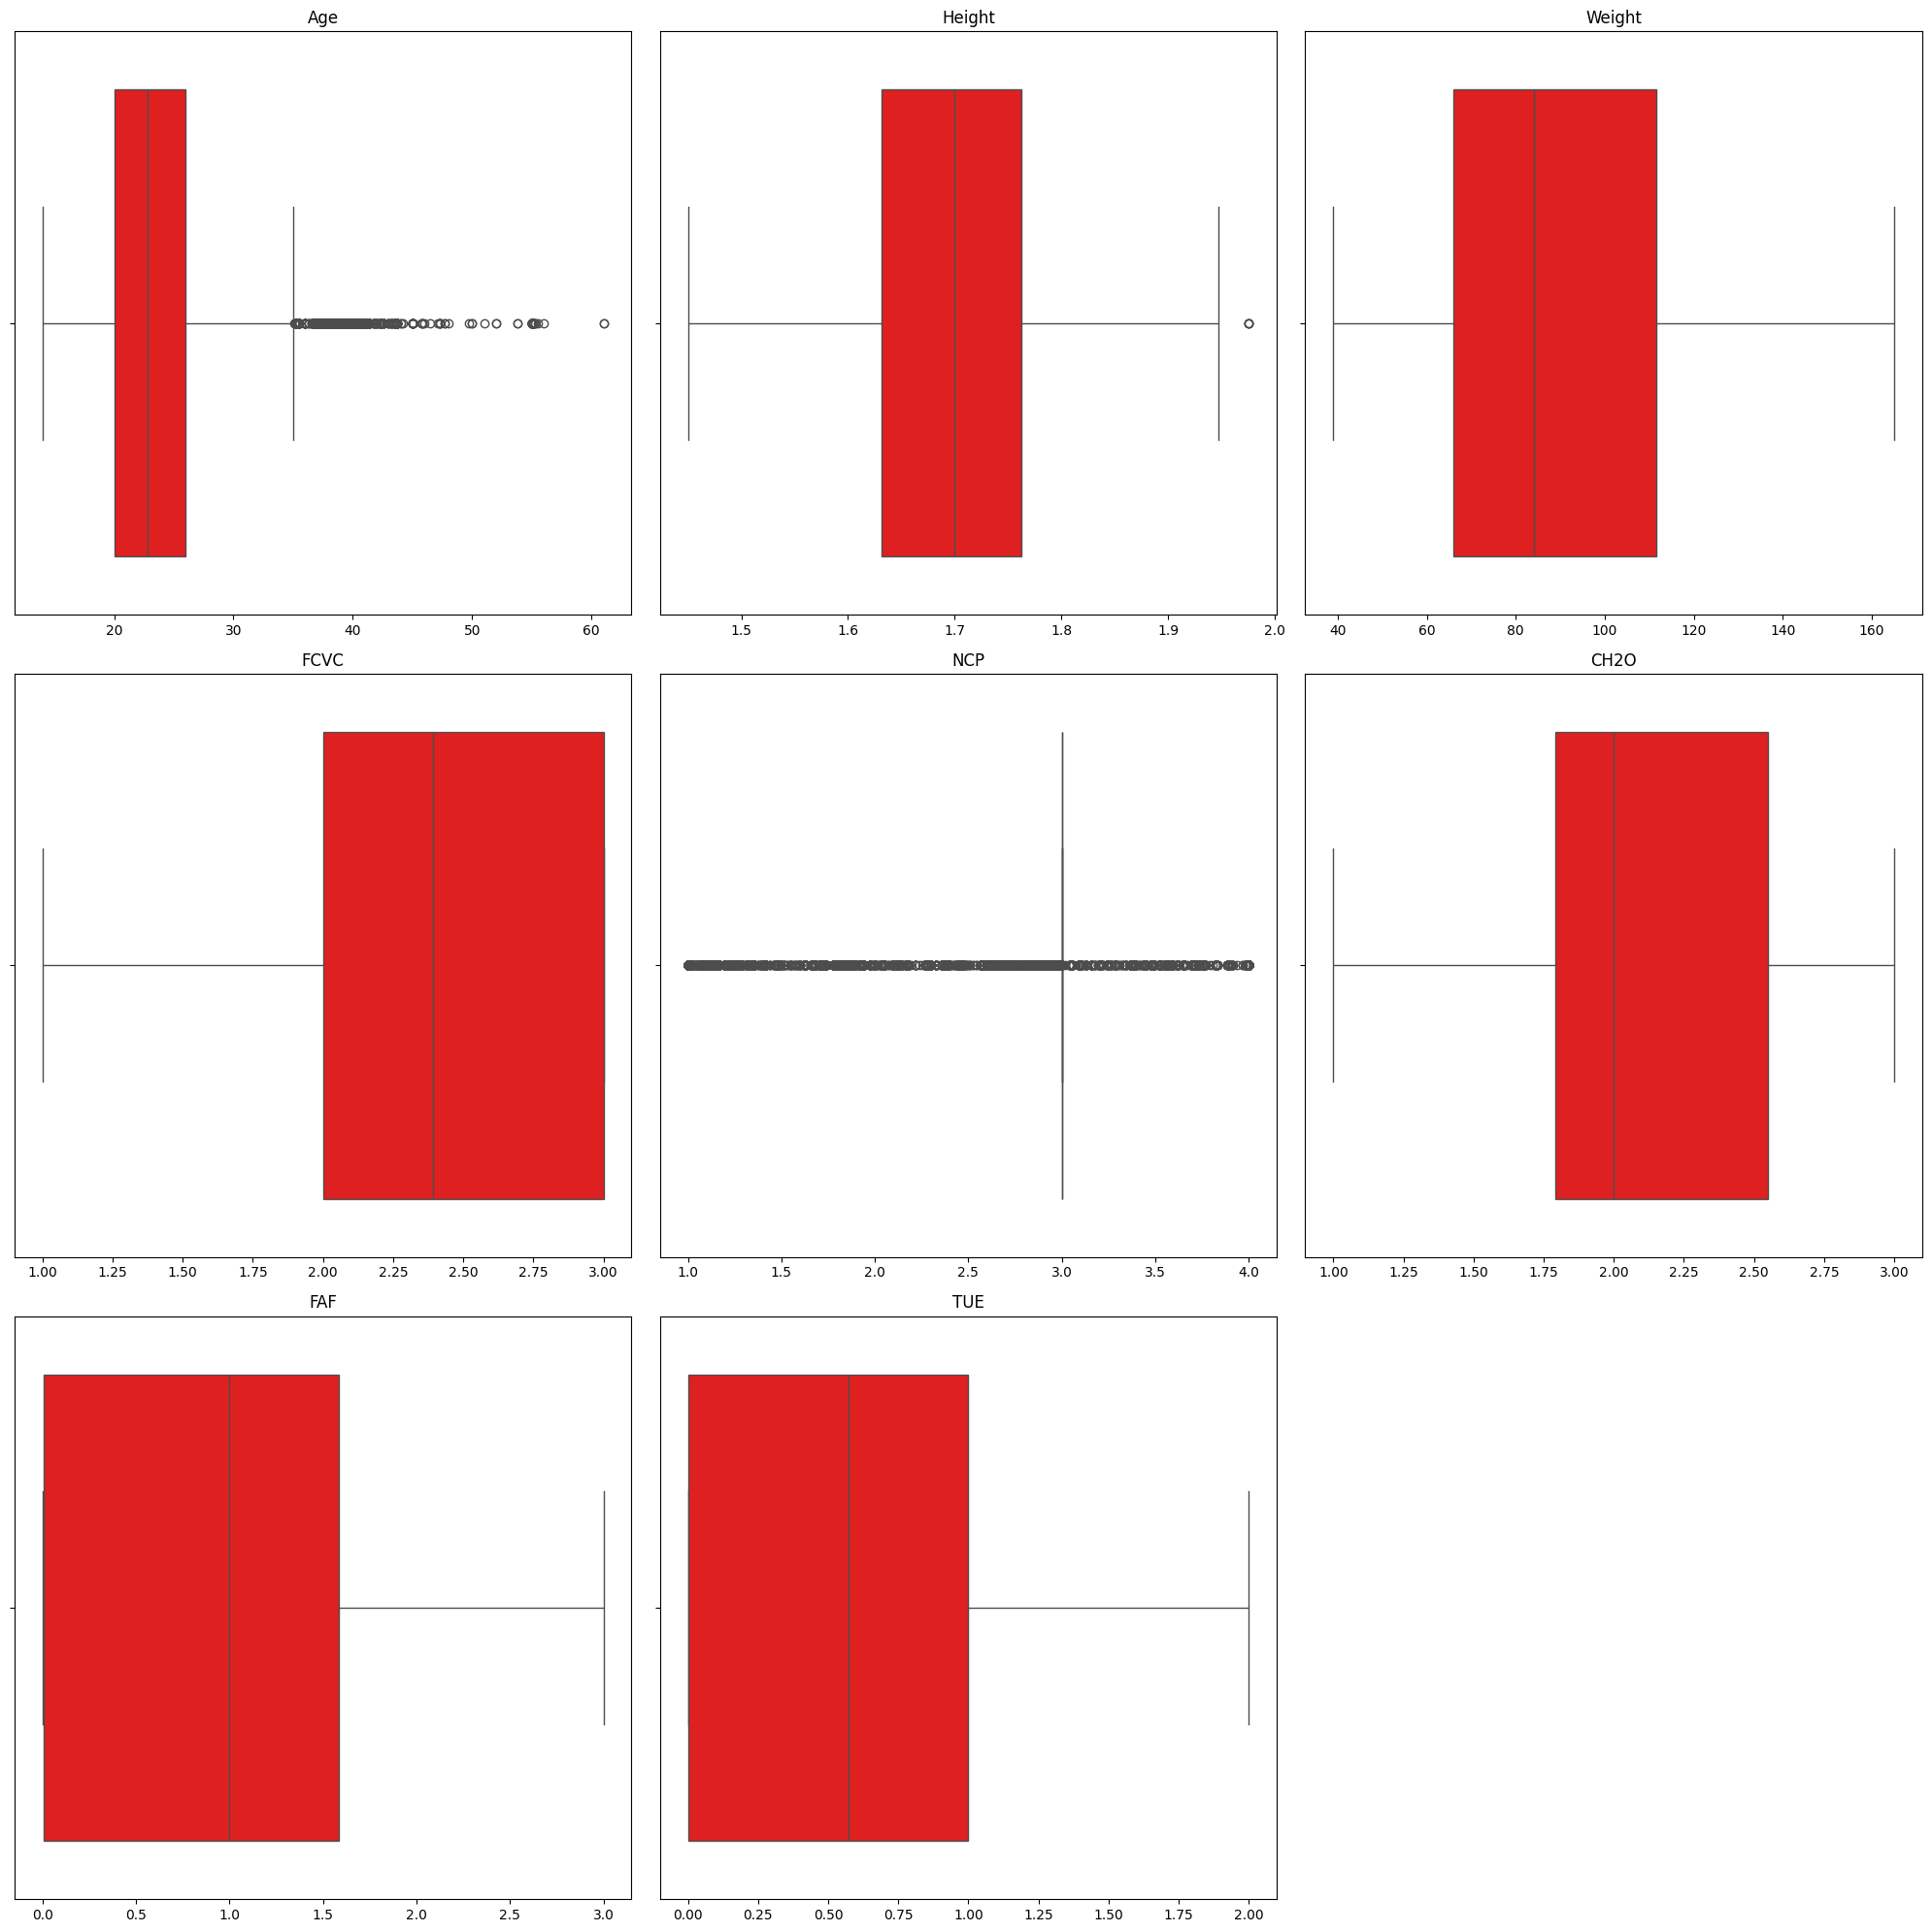

In [53]:
numerical_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
#Box plot
plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df_train[variable],color="red")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

_Inference :_
- Outliers are seen all the feature variables.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 #### ***Outliers present in this dataset are some kind of meaningful outliers,so it is not removed.Make a try to build a model and checks for the accuracy.***
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [54]:
# #Removing the outliers manually:
df_train_2=df_train.copy()

In [55]:
#Calculate the interquartile range (IQR) for each numerical feature
# Q1 = df_train[numerical_variables].quantile(0.25)
# Q3 = df_train[numerical_variables].quantile(0.75)
# IQR = Q3 - Q1
# #---------------------------------------------------------------------------------------------------------------
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_train_2= df_train[((df_train[numerical_variables] >= lower_bound) & (df_train[numerical_variables] <= upper_bound)).all(axis=1)]
# #---------------------------------------------------------------------------------------------------------------
# print("Shape of the data Before removing outliers:", df_train.shape)
# print("Shape of the data After removing outliers:", df_train_2 .shape)

___Feature Engineering and Data Preprocessing:___

_Correlation Matrix :_

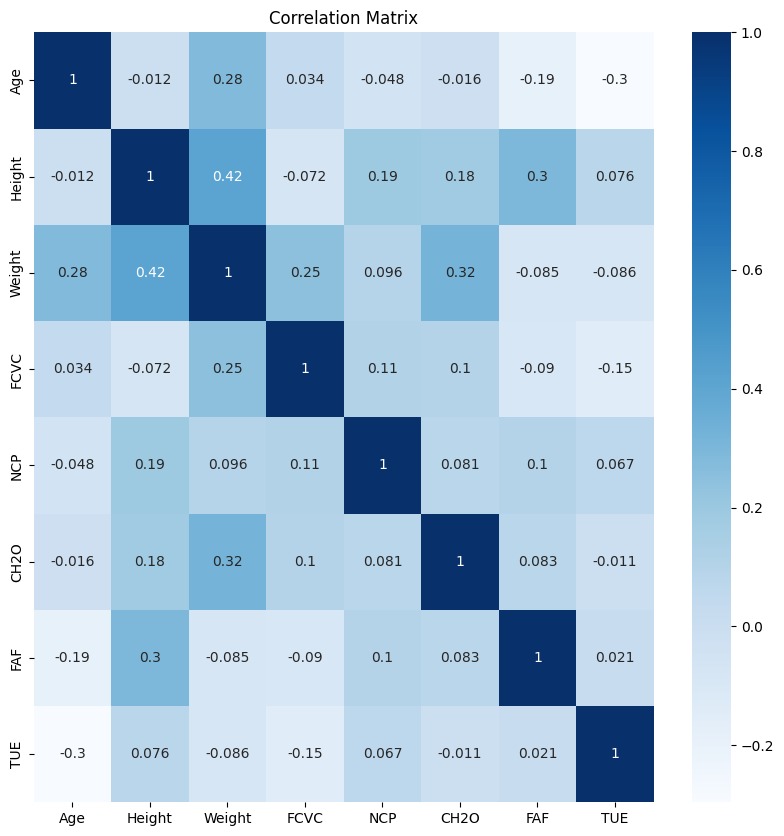

In [56]:
numerical_variables=df_train_2[['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
numerical_variables.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_variables.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [57]:
#Filtering the necessary variables

X=df_train_2[['Gender', 'Age', 'Height',"Weight",'family_history_with_overweight', 'FAVC', 'FCVC','NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y=df_train_2["NObeyesdad"]

_Encoding the Categorical Variables by using One Hot Encoding(OHE) and Label Encoding:_

In [58]:
#Importing necessaey libraries
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
categorical_columns=['Gender','family_history_with_overweight', 'FAVC' ,'CAEC', 'CALC', 'MTRANS']
numerical_columns = ['Age', 'Height',"Weight",'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
#---------------------------------------------------------------------------------------------------------------
#One Hot Encoding(OHE) and scaling the feature variables
categorical_transformer =  OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()
#---------------------------------------------------------------------------------------------------------------
#Fit the data with the pipeline
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_columns),('num', numerical_transformer, numerical_columns)])
#------------------------------------------------------------------------------------------------------------------
X_transformed = preprocessor.fit_transform(X)

In [60]:
X_transformed[0]

array([ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.10569857, -0.00282826,
       -0.23571264, -0.83627898,  0.31468392,  1.20659365, -1.17114146,
        0.59743795])

In [61]:
#Label encoding for target variable based on ordinal values
y_transformed=y.replace({
                        'Insufficient_Weight': 0,
                        'Normal_Weight': 1,
                        'Overweight_Level_I': 2,
                        'Overweight_Level_II': 3,
                        'Obesity_Type_I': 4,
                        'Obesity_Type_II': 5,
                        'Obesity_Type_III': 6
                        })

In [62]:
y_transformed[0:10]

0    3
1    1
2    0
3    6
4    3
5    0
6    5
7    5
8    2
9    6
Name: NObeyesdad, dtype: int64

### ***Machine Learning :***

All the required preprocessing steps and feature selections are done.Now it's a time to build the machine learning model.

In case of multiclass calssification Ensemble methods like  **Random Forests** and Boosting algorithms like **XGBoost (Extreme Gradient Boosting) and CatBoost** ,Because they can handle categorical variables well and avoids overfitiing.

___Checking for Data Imbalance___ :

In [63]:
unique_values, counts = np.unique(y_transformed, return_counts=True)
value_counts = dict(zip(unique_values.tolist(), counts.tolist()))
value_counts

{0: 2523, 1: 3082, 2: 2427, 3: 2522, 4: 2910, 5: 3248, 6: 4046}

There is a class imbalance in this dataset.So that ***"K-Fold Cross Validation Technique"*** is used  and checked for accuracy.

In [64]:
#Import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
# Split the datasets for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=0) 

_Model Training :_

In [66]:
# 5-Folds Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#-----------------------------------------------------------------------------------------------------------------
#Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100,random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=kf,scoring="accuracy")
#-------------------------------------------------------------------------------------------------------------------
#XGBoost Classifier
params = {
    'objective': 'multi:softmax',  
    'num_class': 7,     
    'eval_metric': 'mlogloss',    
    'max_depth': 3,                
    'learning_rate': 0.1,
    'n_estimators': 100           
}
xgb_classifier = xgb.XGBClassifier(**params)
xgb_cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=kf,scoring="accuracy")
#-----------------------------------------------------------------------------------------------------------------
#CatBoost Classifier
cat_boost_classifier= CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')
cat_boost_cv_scores = cross_val_score(cat_boost_classifier, X_train, y_train, cv=kf,scoring="accuracy")

0:	learn: 1.6351102	total: 16.9ms	remaining: 1.67s
1:	learn: 1.4312041	total: 32.5ms	remaining: 1.59s
2:	learn: 1.2910818	total: 48.1ms	remaining: 1.55s
3:	learn: 1.1772316	total: 64.4ms	remaining: 1.54s
4:	learn: 1.0870347	total: 78.7ms	remaining: 1.5s
5:	learn: 1.0099979	total: 95ms	remaining: 1.49s
6:	learn: 0.9469979	total: 110ms	remaining: 1.47s
7:	learn: 0.8927603	total: 127ms	remaining: 1.47s
8:	learn: 0.8403273	total: 146ms	remaining: 1.47s
9:	learn: 0.7948288	total: 161ms	remaining: 1.45s
10:	learn: 0.7579999	total: 177ms	remaining: 1.43s
11:	learn: 0.7243219	total: 194ms	remaining: 1.42s
12:	learn: 0.6961931	total: 210ms	remaining: 1.4s
13:	learn: 0.6690716	total: 227ms	remaining: 1.39s
14:	learn: 0.6443685	total: 243ms	remaining: 1.38s
15:	learn: 0.6220090	total: 258ms	remaining: 1.35s
16:	learn: 0.5995247	total: 273ms	remaining: 1.33s
17:	learn: 0.5815265	total: 288ms	remaining: 1.31s
18:	learn: 0.5643234	total: 304ms	remaining: 1.29s
19:	learn: 0.5497415	total: 320ms	remai

In [67]:
accuracy_data={"Model":["Random Forest","XGBoost","CatBoost"],
               "Mean Accuracy":[rf_cv_scores.mean(),xgb_cv_scores.mean(),cat_boost_cv_scores.mean()],
               "Standard Deviation" :[rf_cv_scores.std(),xgb_cv_scores.std(),cat_boost_cv_scores.std()]}
cv_scores=pd.DataFrame(accuracy_data)
cv_scores

,Model,Mean Accuracy,Standard Deviation
0,Random Forest,0.889739,0.004487
1,XGBoost,0.897146,0.003664
2,CatBoost,0.893533,0.001756


- _The cross validation results shows, there is not as much change in accuracy of the models when the models are trained with difference subsets of data,since the standard deviation(sd) is very small._

___Model Evaluation :___

_Comparing Train and Test Accuracy :_

In [68]:
#Import necessary Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:
#Function for accuracy
def test_train_accuracy(model, X_train, X_test, y_train, y_test, model_name):
        model.fit(X_train, y_train)
        train_prediction = model.predict(X_train)
        test_prediction = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_prediction)
        test_accuracy = accuracy_score(y_test, test_prediction)
        print("Train Accuracy of", model_name, ":", train_accuracy)
        print("Test Accuracy of", model_name, ":", test_accuracy)
        print("*" * 100)

test_train_accuracy(rf_classifier, X_train, X_test, y_train, y_test, "Random Forest Classifier")
test_train_accuracy(xgb_classifier, X_train, X_test, y_train, y_test, "XGBoost Classifier")
test_train_accuracy(cat_boost_classifier, X_train, X_test, y_train, y_test, "CatBoost Classifier")

Train Accuracy of Random Forest Classifier : 0.9999397808021198
Test Accuracy of Random Forest Classifier : 0.891859344894027
****************************************************************************************************
Train Accuracy of XGBoost Classifier : 0.905516078525834
Test Accuracy of XGBoost Classifier : 0.8959537572254336
****************************************************************************************************
0:	learn: 1.6368129	total: 23.8ms	remaining: 2.36s
1:	learn: 1.4356616	total: 47.8ms	remaining: 2.34s
2:	learn: 1.2932747	total: 68.1ms	remaining: 2.2s
3:	learn: 1.1742031	total: 90.3ms	remaining: 2.17s
4:	learn: 1.0825063	total: 110ms	remaining: 2.09s
5:	learn: 0.9990860	total: 131ms	remaining: 2.05s
6:	learn: 0.9352390	total: 150ms	remaining: 1.99s
7:	learn: 0.8805034	total: 168ms	remaining: 1.94s
8:	learn: 0.8301264	total: 186ms	remaining: 1.88s
9:	learn: 0.7828870	total: 204ms	remaining: 1.84s
10:	learn: 0.7458312	total: 224ms	remaining: 1.81s
11:	

_Classification Report_:

In [70]:
from sklearn.metrics import classification_report

def classification_scores(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    # y_pred_test = model.predict(X_test)
    
    # Classification Report
    print("Classification Report for", model_name, ":")
    print(classification_report(y_train, y_pred_train))
    print("*" * 100)
classification_scores(rf_classifier, X_train, X_test, y_train, y_test, "Random Forest Classifier")
classification_scores(xgb_classifier, X_train, X_test, y_train, y_test, "XGBoost Classifier")
classification_scores(cat_boost_classifier, X_train, X_test, y_train, y_test, "CatBoost Classifier")

Classification Report for Random Forest Classifier :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2045
           1       1.00      1.00      1.00      2452
           2       1.00      1.00      1.00      1955
           3       1.00      1.00      1.00      2012
           4       1.00      1.00      1.00      2328
           5       1.00      1.00      1.00      2575
           6       1.00      1.00      1.00      3239

    accuracy                           1.00     16606
   macro avg       1.00      1.00      1.00     16606
weighted avg       1.00      1.00      1.00     16606

****************************************************************************************************
Classification Report for XGBoost Classifier :
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2045
           1       0.86      0.89      0.88      2452
           2       0.83      0.75      

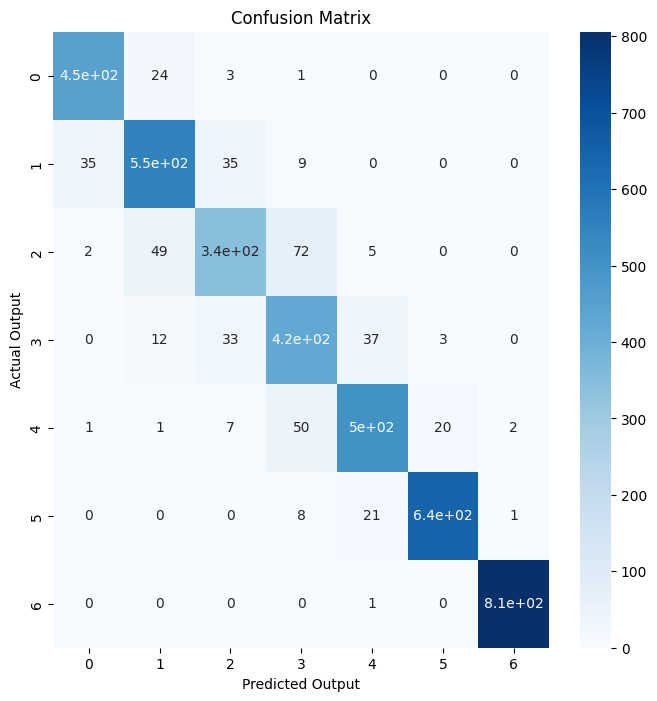

In [71]:
#Confusion Matrix for XGBoost Classifier
xgb_prediction=xgb_classifier.predict(X_test)
#--------------------------------------------------------
conf_matrix = confusion_matrix(y_test, xgb_prediction)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

_Actual vs Prediction :_

In [93]:
# Actual Class vs Predicted Class Comparison
xgb_output= pd.DataFrame({'Actual': y_test, 'Predicted': xgb_prediction})
xgb_output.replace({                    0: 'Insufficient_Weight',
                                        1: 'Normal_Weight',
                                        2: 'Overweight_Level_I',
                                        3: 'Overweight_Level_II',
                                        4: 'Obesity_Type_I',
                                        5: 'Obesity_Type_II',
                                        6: 'Obesity_Type_III'
                                },inplace=True)
xgb_output.sample(5)

,Actual,Predicted
11945,Obesity_Type_II,Overweight_Level_II
16788,Overweight_Level_II,Overweight_Level_II
4254,Obesity_Type_I,Overweight_Level_II
4891,Obesity_Type_I,Obesity_Type_I
13140,Obesity_Type_II,Obesity_Type_II


- ___While comparing the train and test accuarcy of the 3 models,Random Forest Classifier shows a accuracy difference of nearly 10%.The train accuarcy is 0.99 and test accuracy is 0.89.This evidently shows the model is "overfitted" and is not considered as a good model.___
- __F1-Score also good.In future the model is trained with huge and balanced data and checked for accuracy.__
- ___When comparing with CatBoost Classifier, "XGBoost Classifier" gives a good accuracy in predicting different output classes.Therefore this is considered as the best model in this scenario.___


### ___Sample  Data Prediction :___

In [73]:
#Loading the Sample data
df_test=pd.read_csv("test.csv")
print("Shape of  Test data  :",df_test.shape)
df_test.head(2)

Shape of  Test data  : (13840, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.0000,0.0,Sometimes,Public_Transportation


In [74]:
#Checking for duplicates
df_test.duplicated().sum()

0

In [75]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for variable in categorical_variables:
     print("-"*100)
     print(df_test[variable].value_counts())

----------------------------------------------------------------------------------------------------
Gender
Female    6965
Male      6875
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
FAVC
yes    12583
no      1257
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SMOKE
no     13660
yes      180
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SCC
no     13376
yes  

In [76]:
#In "CALC" column we trained the model with 3 different categories but in test data there are 4 different categories are present so grouping the categories in a relavant manner into 3 different categories
df_test["CALC"]=df_test["CALC"].replace({"Always":"Frequently"})

In [77]:
#Considering the required columns
X_test=df_test[['Gender', 'Age', 'Height', 'Weight','family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC','CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS']]

In [78]:
#OHE and Scaling the data (Pipeline)
X_test_transformed = preprocessor.fit_transform(X_test)

In [79]:
X_test_transformed[0]

array([ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.50816334,  1.68278868,
        1.27378625,  0.93252439,  0.35080784,  1.29838883, -0.14176856,
       -1.00501606])

_Predict output using XGBoost Model:_

In [94]:
#Predict the output using "xgb_classifier"
predicted_output=xgb_classifier.predict(X_test_transformed)
#-------------------------------------------------------------------------------------
#list of "Id" and "predicted outputs"
predicted_output_list=predicted_output.tolist()
id_list=df_test["id"].to_list()
#-------------------------------------------------------------------------------------
#Dataframe
output_data={"id":id_list,"NObeyesdad":predicted_output_list}
df_test_output=pd.DataFrame(output_data)
#--------------------------------------------------------------------------------------
#Decode the labels to their original categories
df_test_output["NObeyesdad"].replace({  0: 'Insufficient_Weight',
                                        1: 'Normal_Weight',
                                        2: 'Overweight_Level_I',
                                        3: 'Overweight_Level_II',
                                        4: 'Obesity_Type_I',
                                        5: 'Obesity_Type_II',
                                        6: 'Obesity_Type_III'
                                     },inplace=True)
#--------------------------------------------------------------------------------------
#Output 
df_test_output[0:5]

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


### ___Output Submission :___

- The predicted outputs of sample data is saved into ".csv" file.

In [95]:
df_test_output.to_csv("sample_output_submission.csv",index=False)

***Suggestions :***

- In future the model is trained with more number of balanced data and trained with different models and hyper tuned to reach out maximum accuracy with low bias and low variance. 